In [2]:
import torch
from torch.nn.functional import relu
from lib.mnist_aug.mnist_augmenter import DataManager, MNISTAug

In [3]:
aug = MNISTAug()
dm = DataManager()
dm.load_test()

In [4]:
x, y = aug.get_augmented(dm.x_test, dm.y_test, 10)

In [5]:
x = torch.tensor(x.reshape(-1, 1, 112, 112)).type('torch.FloatTensor')

/Users/akhildevarashetti/Code/ml_gallery/ml_py/lib/mnist_aug/mnist_augmenter.py:152: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[{'class': 0,
  'class_one_hot': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'x1': 38,
  'y1': 1,
  'x2': 74,
  'y2': 37,
  'cx': 56.0,
  'cy': 19.0,
  'height': 36,
  'width': 36}]

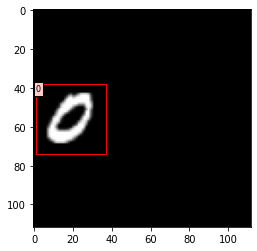

In [6]:
DataManager.plot_num(x[1].reshape((112, 112)), y[1])
y[1]

In [7]:
anchor_cx = 56
anchor_cy = 56
anchor_h = 28
anchor_w = 28

In [19]:
class DetectorV1 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, 3, padding=1)  # 112x112
        self.conv2 = torch.nn.Conv2d(32, 64, 3, stride=2, padding=1)  # 56x56
        self.conv3 = torch.nn.Conv2d(64, 128, 3, stride=2, padding=1)  # 28x28
        self.conv4 = torch.nn.Conv2d(128, 256, 3, stride=2, padding=1)  # 14x14
        self.conv5 = torch.nn.Conv2d(256, 512, 3, stride=2, padding=1)  # 7x7
        self.linear1 = torch.nn.Linear(25088, 4096)
        self.linear2 = torch.nn.Linear(4096, 512)
        self.linear3 = torch.nn.Linear(512, 4)

    def forward(self, x):
        x = relu(self.conv1(x))  # 112
        x = relu(self.conv2(x))  # 56
        x = relu(self.conv3(x))  # 28
        x = relu(self.conv4(x))  # 14
        x = relu(self.conv5(x))  # 7
        x = torch.flatten(x, 1)
        x = relu(self.linear1(x))
        x = relu(self.linear2(x))
        x = torch.nn.functional.tanh(self.linear3(x))
        return x


model = DetectorV1()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
epochs = 10

for epoch in range(epochs):

    optimizer.zero_grad()

    y_hat = model(x)

    y_d = []
    for i in range(len(y)):
        cx_d = (y[i][0]['cx'] - anchor_cx) / 112
        cy_d = (y[i][0]['cy'] - anchor_cy) / 112
        w_d = (y[i][0]['width'] - anchor_w) / 112
        h_d = (y[i][0]['height'] - anchor_h) / 112
        y_d.append((cx_d, cy_d, w_d, h_d))
    y_d = torch.tensor(y_d)  # TODO: Move this to preprocessing

    loss = sum(sum((y_d - y_hat[0])**2))
    print(loss)
    
    loss.backward()
    optimizer.step()

/Users/akhildevarashetti/Code/ml_gallery/ml_py/venv/lib/python3.8/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor(1.1062, grad_fn=<AddBackward0>)
tensor(7.2193, grad_fn=<AddBackward0>)
tensor(1.4599, grad_fn=<AddBackward0>)
tensor(1.1722, grad_fn=<AddBackward0>)
tensor(1.0373, grad_fn=<AddBackward0>)
tensor(0.9993, grad_fn=<AddBackward0>)
tensor(0.9523, grad_fn=<AddBackward0>)
tensor(0.8824, grad_fn=<AddBackward0>)
tensor(0.9232, grad_fn=<AddBackward0>)
tensor(0.8739, grad_fn=<AddBackward0>)
